In [1]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import importlib

import stereo_seq.constants.paths as scp
import stereo_seq.constants.celltype_maps as scc
import stereo_seq.utils.plotting as pl
import stereo_seq.utils.load as sul
import stereo_seq.utils.preprocessing as sup
import stereo_seq.constants.marker_genes as scm
import stereo_seq.constants.ordering as sco
import stereo_seq.utils.exploration as sue

BASE_DIR = scp.BASE_DIR
DATA_DIR = scp.DATA_DIR
FIGURE_DIR = scp.FIGURE_DIR
GROUP_MAPPING =  scc.SUBClASS_TO_CLASS_MAPPING
PLT_CONTEXT=pl.PLT_CONTEXT


## QC 

In [2]:
#Edit this to do different datasets; Run this line before using notebook
region = 'SC'
timepoint='P42'
group='DR'
subgroup='annotation'
scp.init_paths(region)

### Preprocess and annotate

In [3]:
importlib.reload(scp)
data_dir = scp.make_path(base='data',region=region,timepoint=timepoint,group=group,subgroup='')
figure_dir = scp.make_path(base='figures',region=region,timepoint=timepoint,group=group,subgroup=subgroup)
samples=scp.SAMPLES[region][timepoint][group]

AnnData object with n_obs × n_vars = 32285 × 13389
                    ensembl_id
gene_name                     
Xkr4        ENSMUSG00000051951
Gm1992      ENSMUSG00000089699
Gm19938     ENSMUSG00000102331
Gm37381     ENSMUSG00000102343
Rp1         ENSMUSG00000025900
...                        ...
AC124606.1  ENSMUSG00000095523
AC133095.2  ENSMUSG00000095475
AC133095.1  ENSMUSG00000094855
AC234645.1  ENSMUSG00000095019
AC149090.1  ENSMUSG00000095041

[32285 rows x 1 columns]
AnnData object with n_obs × n_vars = 32285 × 13958
                    ensembl_id
gene_name                     
Xkr4        ENSMUSG00000051951
Gm1992      ENSMUSG00000089699
Gm19938     ENSMUSG00000102331
Gm37381     ENSMUSG00000102343
Rp1         ENSMUSG00000025900
...                        ...
AC124606.1  ENSMUSG00000095523
AC133095.2  ENSMUSG00000095475
AC133095.1  ENSMUSG00000094855
AC234645.1  ENSMUSG00000095019
AC149090.1  ENSMUSG00000095041

[32285 rows x 1 columns]


/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


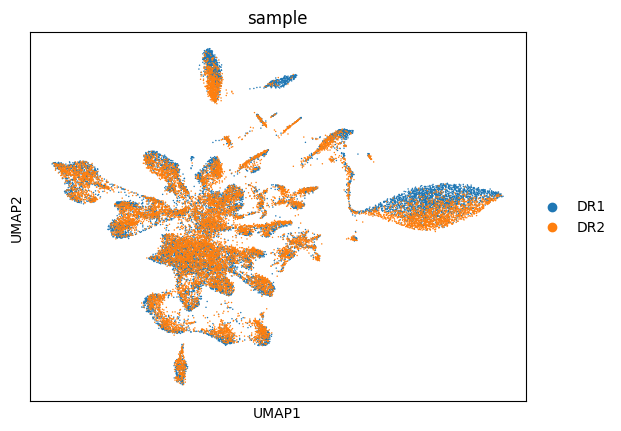

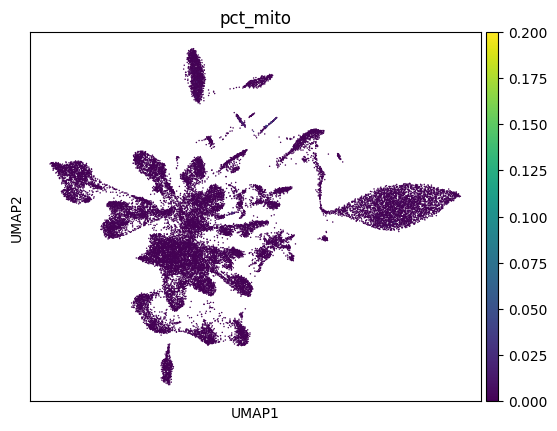

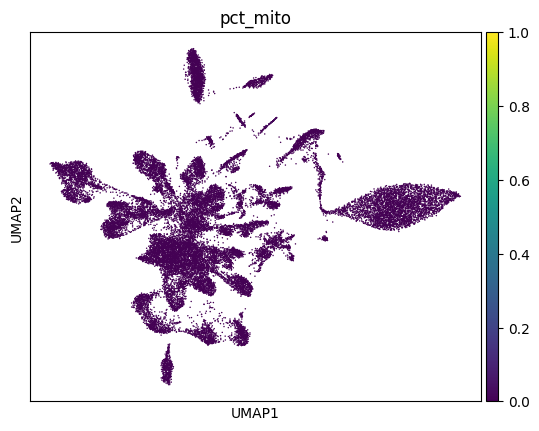

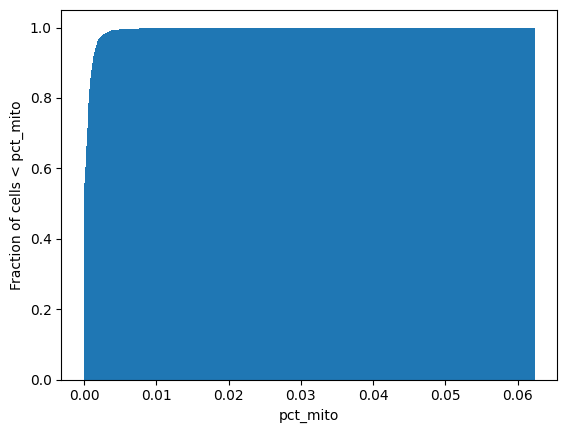

AnnData object with n_obs × n_vars = 27347 × 32285
    obs: 'sample', 'mRNA_count', 'n_mito', 'pct_mito', 'n_genes', 'n_counts', 'leiden'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'leiden', 'umap', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p'
    obsp: 'distances', 'connectivities'

In [4]:
adata = sul.merge_dfs(samples,f="filtered_feature_bc_matrix",out_f=os.path.join(data_dir,"merged_raw.h5ad"),format="custom")
sup.pipeline(adata,batch=False,min_genes=100,output_f=os.path.join(data_dir,"merged_filt.h5ad"),figure_dir=figure_dir,inplace=True)

{'Excitatory Neuron': {'marker_genes': ['Slc17a6'], 'z-scores': [0.7], 'pct_in': 0.2}, 'Inhibitory Neuron': {'marker_genes': ['Gad1', 'Gad2'], 'z-scores': [1.0, 1.0], 'pct_in': 0.4}, 'Astrocyte': {'marker_genes': ['Aqp4', 'Aldh1a1'], 'z-scores': [1, 2], 'pct_in': 0.4}, 'Microglia': {'marker_genes': ['Cx3cr1'], 'z-scores': [2], 'pct_in': 0.4}, 'OPC': {'marker_genes': ['Pdgfra'], 'z-scores': [2], 'pct_in': 0.5}, 'Oligodendrocyte': {'marker_genes': ['Mbp'], 'z-scores': [1.5], 'pct_in': 0.4}, 'Pericyte': {'marker_genes': ['Cspg4', 'Pdgfrb'], 'z-scores': [2, 2], 'pct_in': 0.5}, 'Meninges': {'marker_genes': ['Foxc1'], 'z-scores': [1.5], 'pct_in': 0.5}, 'Epithelial': {'marker_genes': ['Ranbp3l', 'Col4a5', 'Col4a6'], 'z-scores': [2, 2, 2], 'pct_in': 0.4}, 'T-cell': {'marker_genes': ['Mrc1', 'F13a1'], 'z-scores': [2, 2], 'pct_in': 0.3}, 'Endothelial': {'marker_genes': ['Slco1a4', 'Flt1'], 'z-scores': [2, 2], 'pct_in': 0.3}}


/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


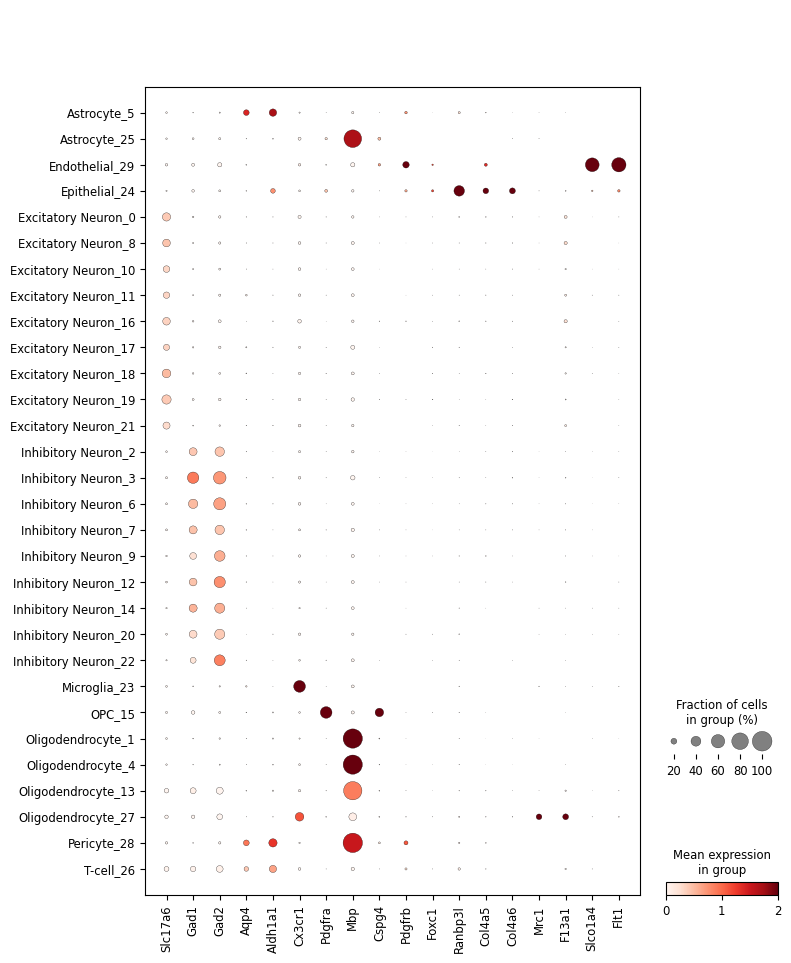

In [5]:
import pandas as pd
importlib.reload(sup)
importlib.reload(scm)
importlib.reload(scc)
importlib.reload(sup)
#adata = sc.read_h5ad(os.path.join(data_dir,"merged_filt.h5ad"))
print(scm.MARKER_GENES)
df = sup.annotate_adata(adata,scm.MARKER_GENES, class_col='subclass', override=scc.UNCERTAIN_MAPPING[region][timepoint][group]['clust_class_override'], plot=False)

### Summary of Statistics:

Warning, Meninges is not present as an actually annotated class; Skipping
Warning, Doublet is not present as an actually annotated class; Skipping
Warning, ? is not present as an actually annotated class; Skipping
Categories Order: ['Excitatory Neuron_1', 'Excitatory Neuron_2', 'Excitatory Neuron_3', 'Excitatory Neuron_4', 'Excitatory Neuron_5', 'Excitatory Neuron_6', 'Excitatory Neuron_7', 'Excitatory Neuron_8', 'Excitatory Neuron_9', 'Inhibitory Neuron_1', 'Inhibitory Neuron_2', 'Inhibitory Neuron_3', 'Inhibitory Neuron_4', 'Inhibitory Neuron_5', 'Inhibitory Neuron_6', 'Inhibitory Neuron_7', 'Inhibitory Neuron_8', 'Inhibitory Neuron_9', 'Astrocyte_1', 'Astrocyte_2', 'Microglia', 'OPC', 'Oligodendrocyte_1', 'Oligodendrocyte_2', 'Oligodendrocyte_3', 'Oligodendrocyte_4', 'Pericyte', 'Epithelial', 'T-cell', 'Endothelial']
Variable Names: ['Slc17a6', 'Gad1', 'Gad2', 'Aqp4', 'Aldh1a1', 'Cx3cr1', 'Pdgfra', 'Mbp', 'Cspg4', 'Pdgfrb', 'Ranbp3l', 'Col4a5', 'Col4a6', 'Mrc1', 'F13a1', 'Slco1a4', 

/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


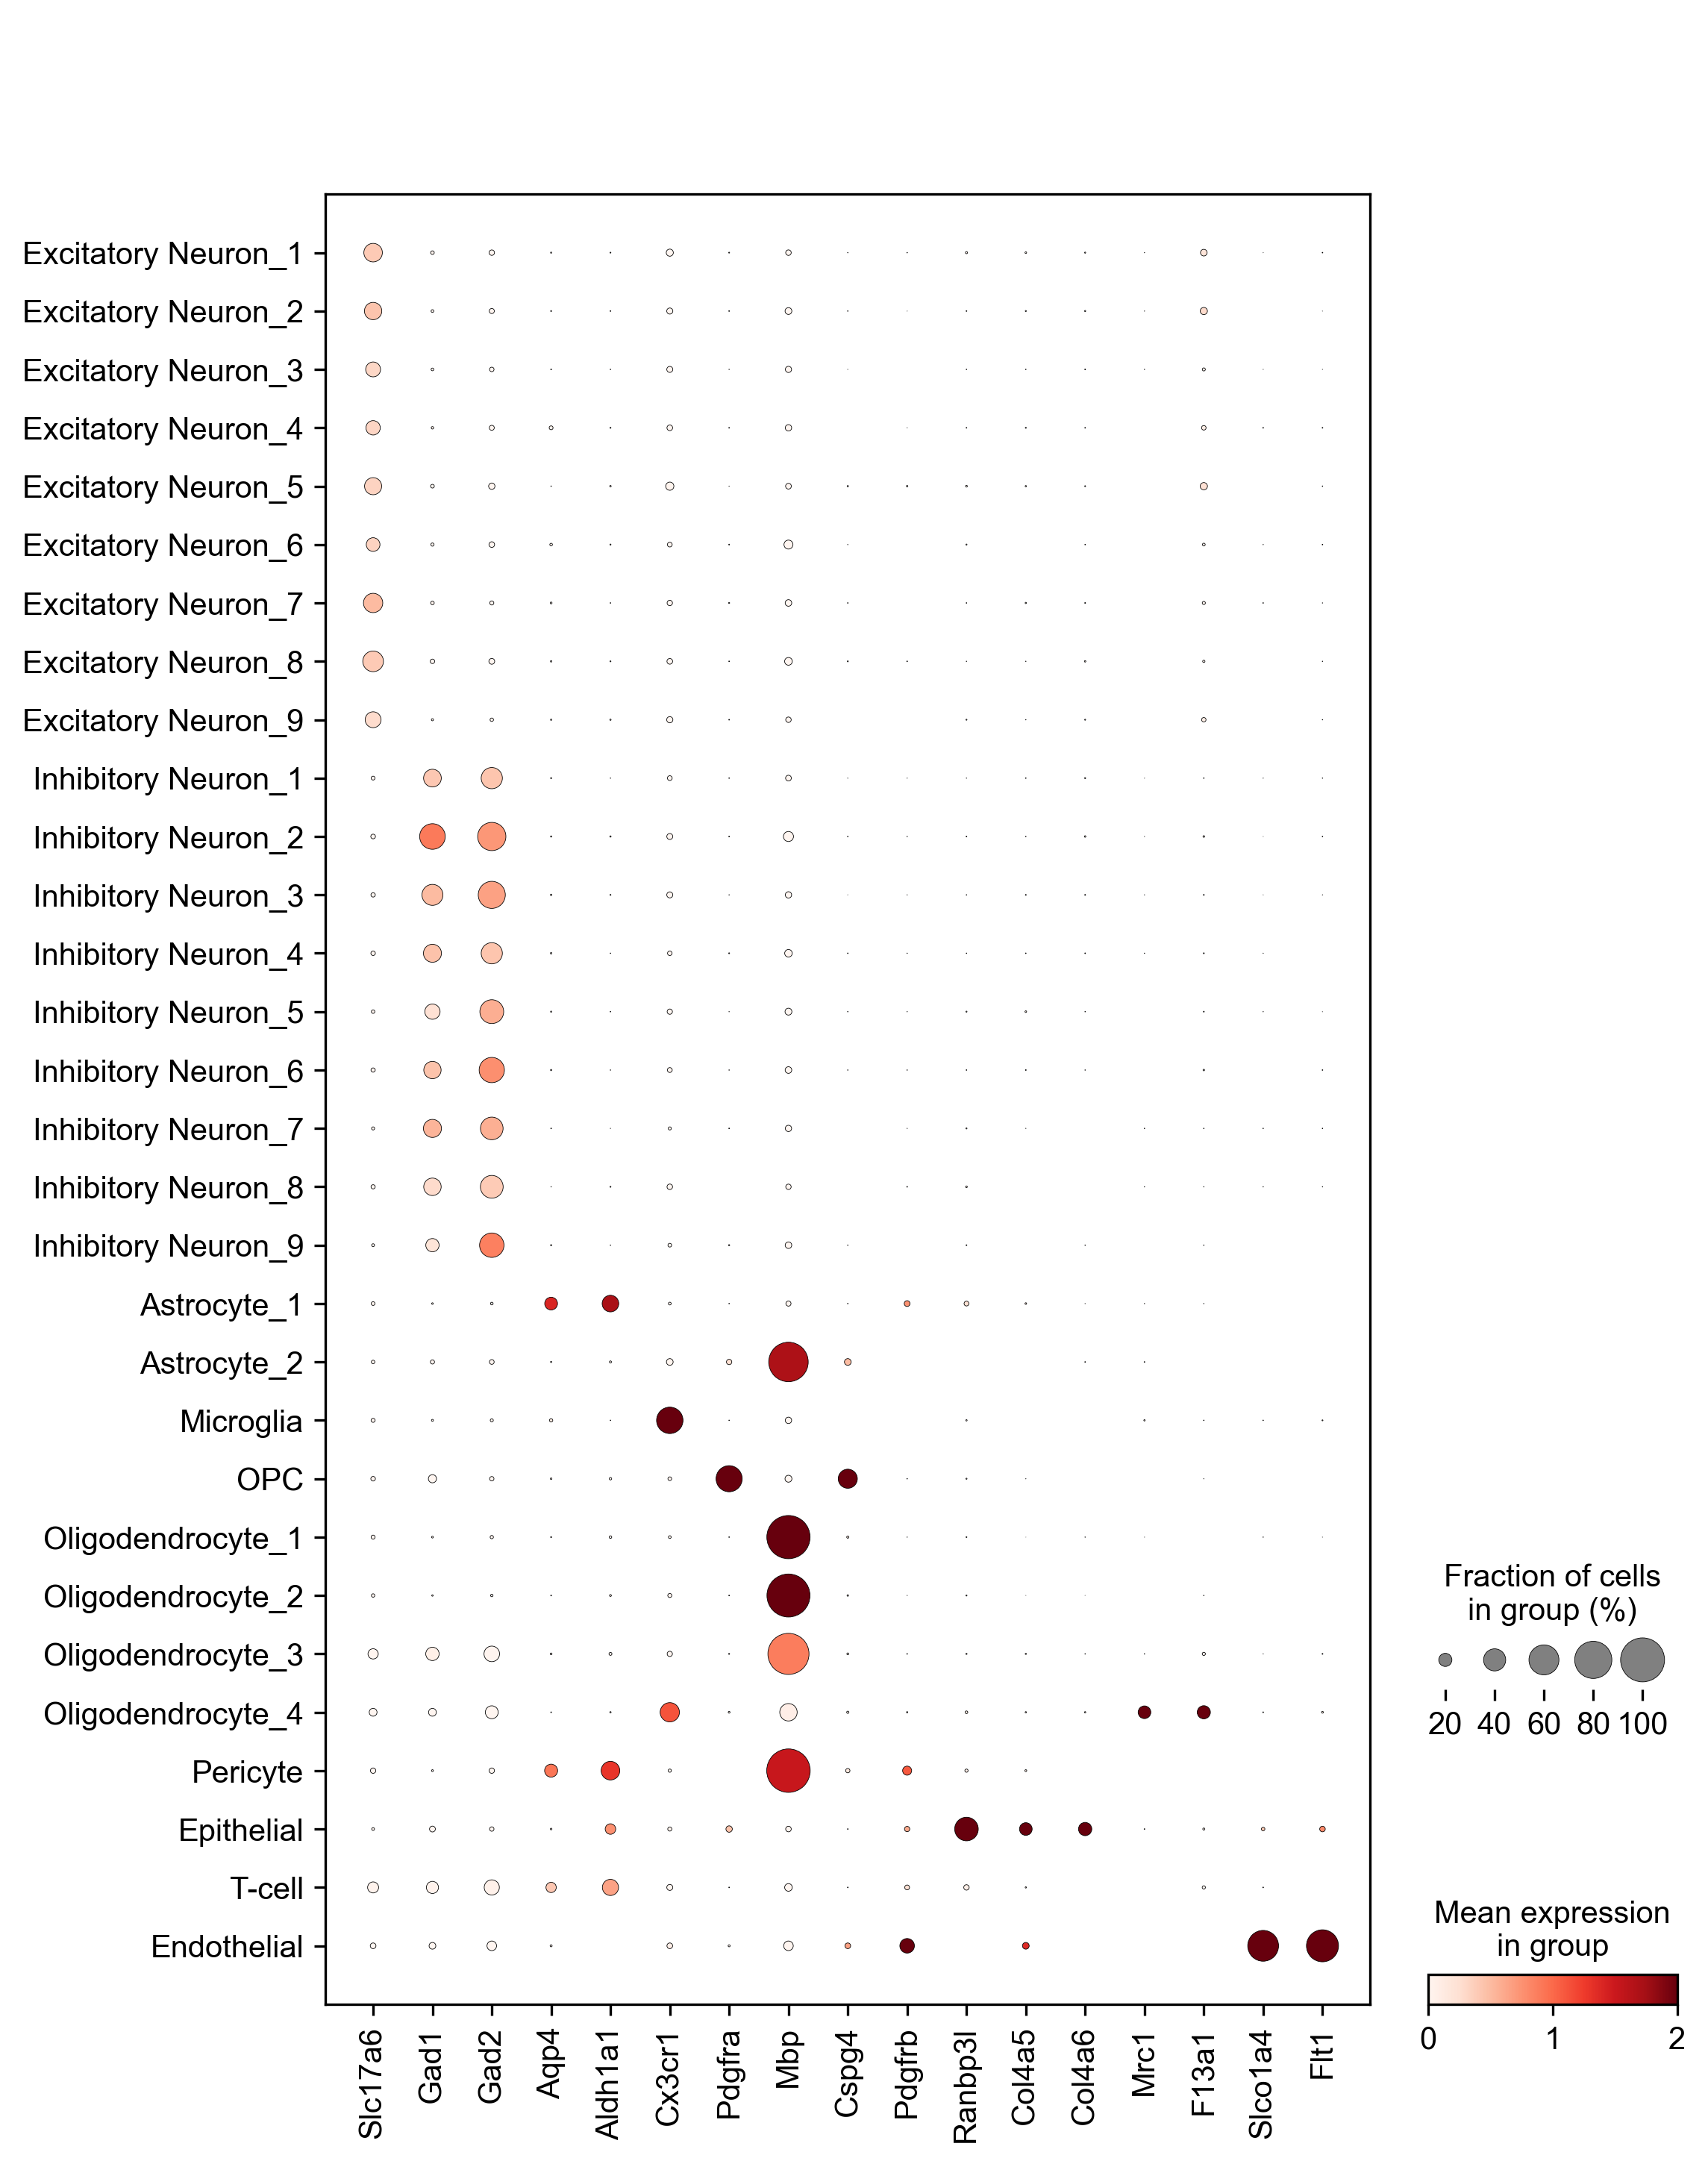

/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector

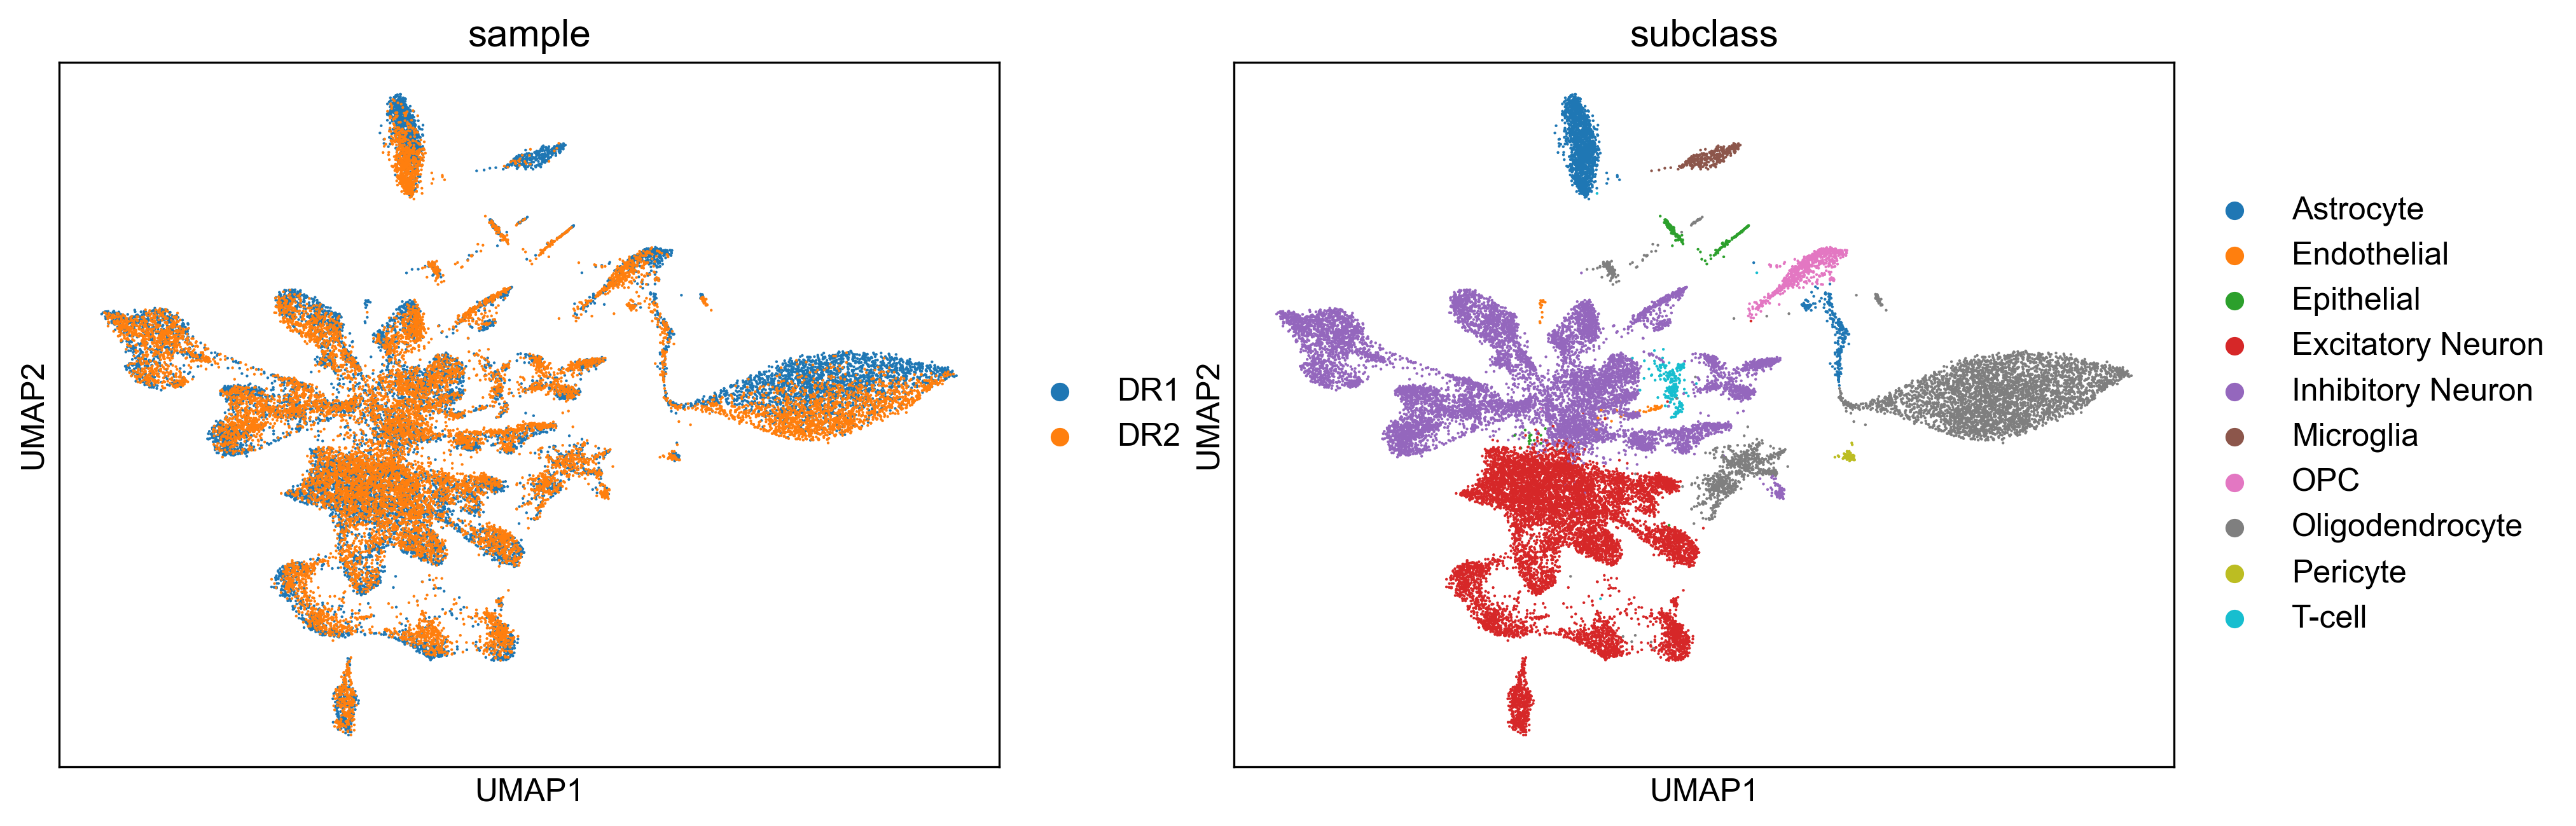

/Users/antheaguo/Documents/Code/brainRCResearch/stereo-seq-kushal/stereo-seq/stereo_seq/utils/exploration.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


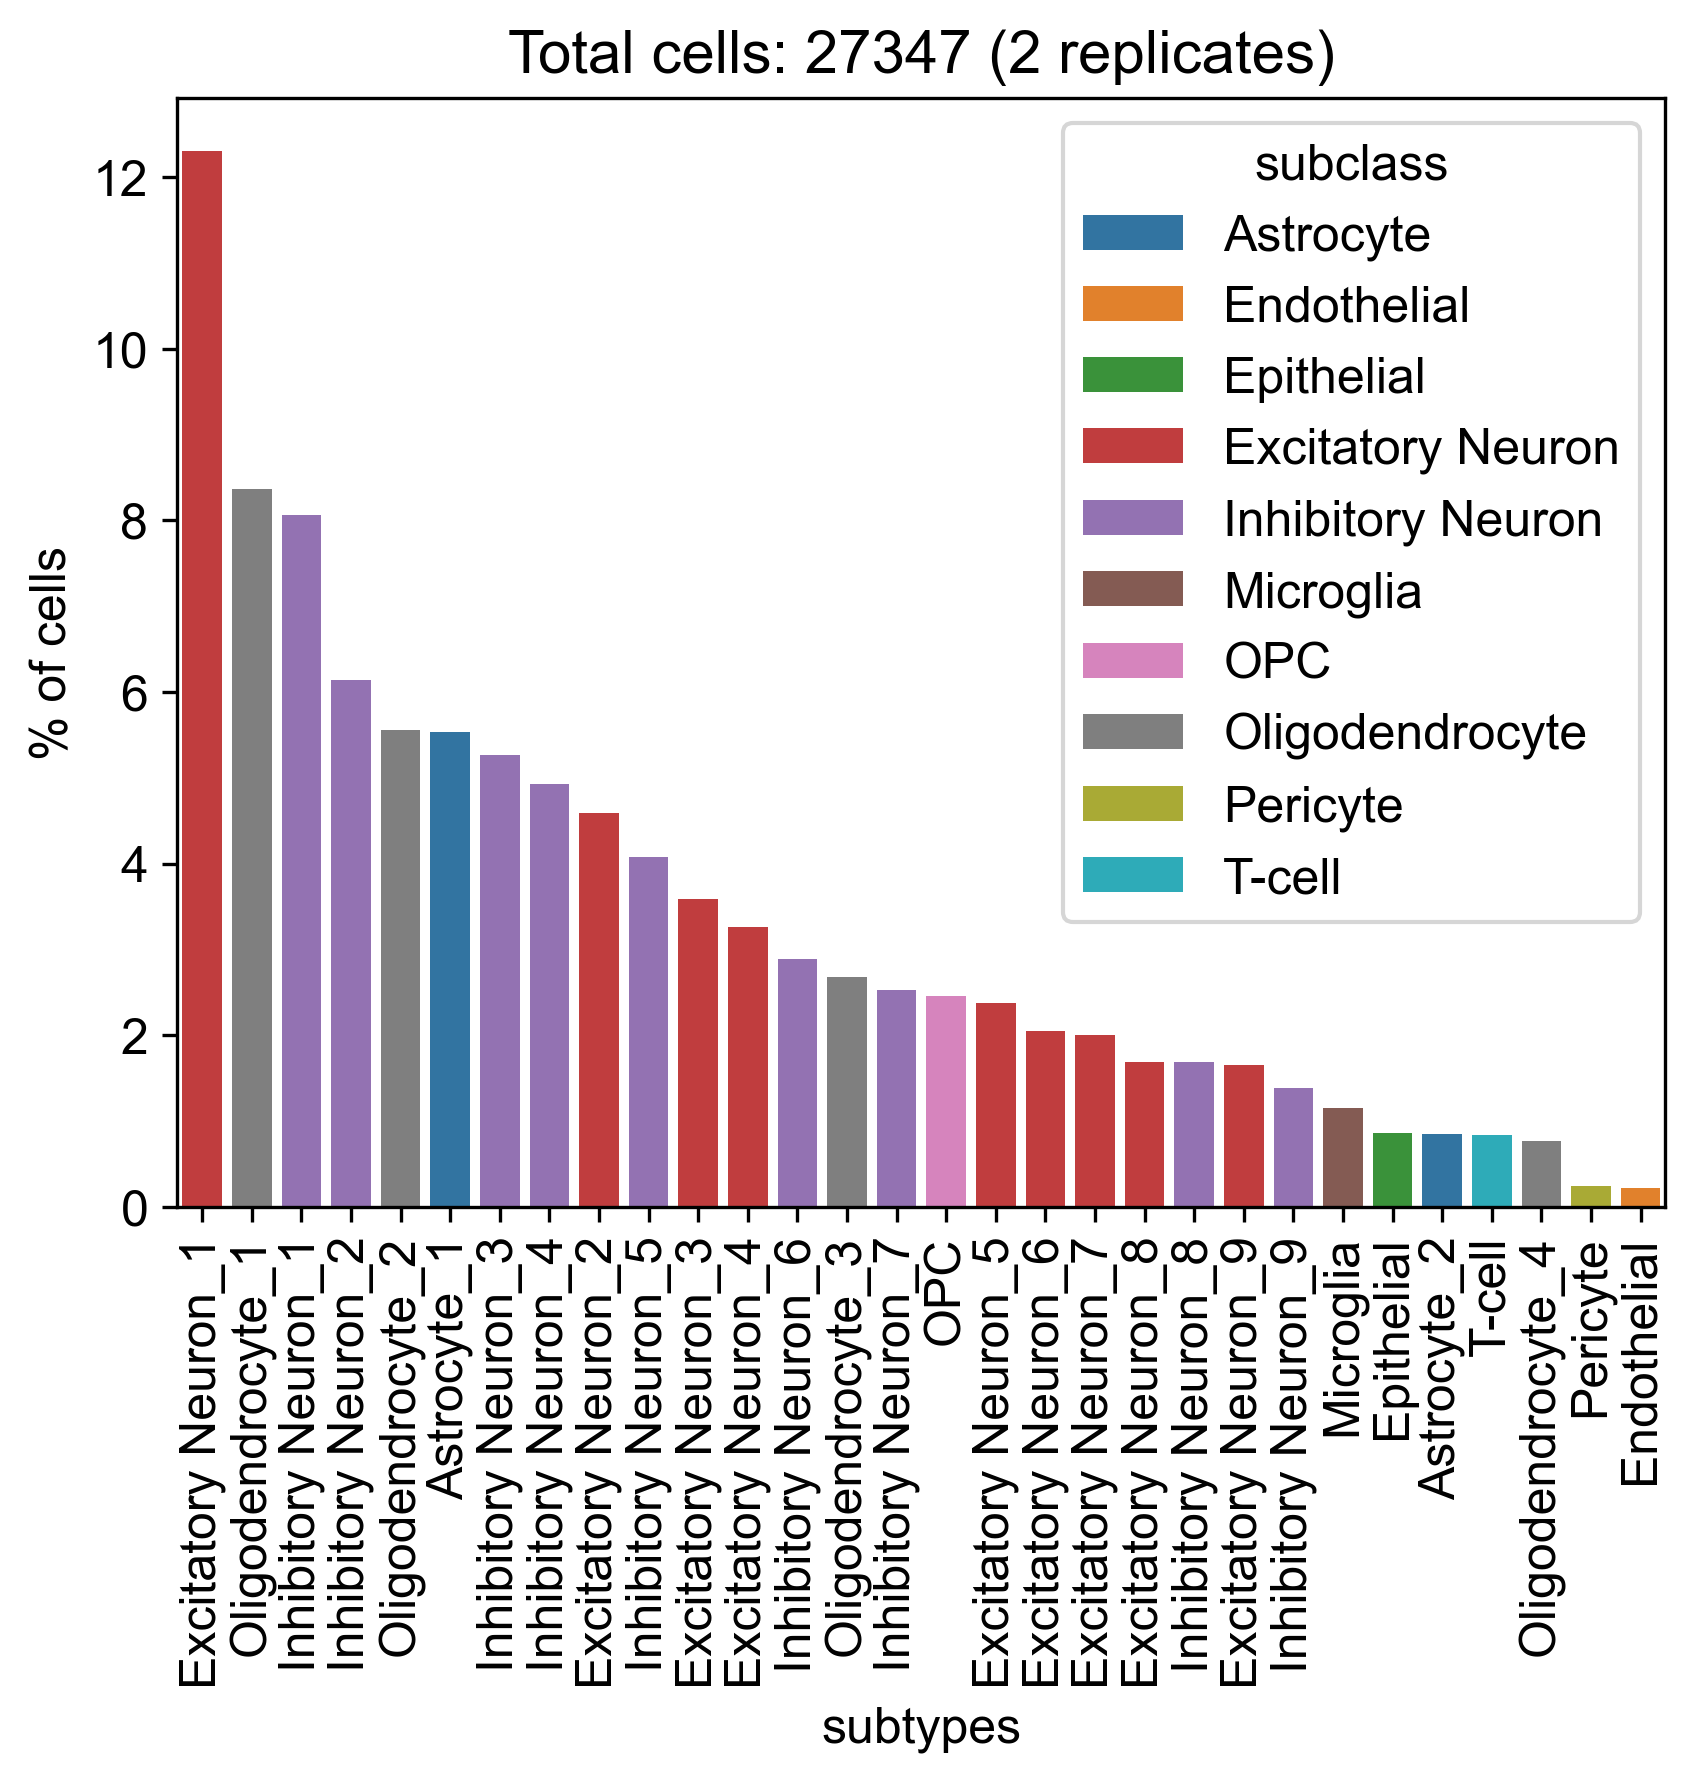

/Users/antheaguo/Documents/Code/brainRCResearch/stereo-seq-kushal/stereo-seq/stereo_seq/utils/exploration.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


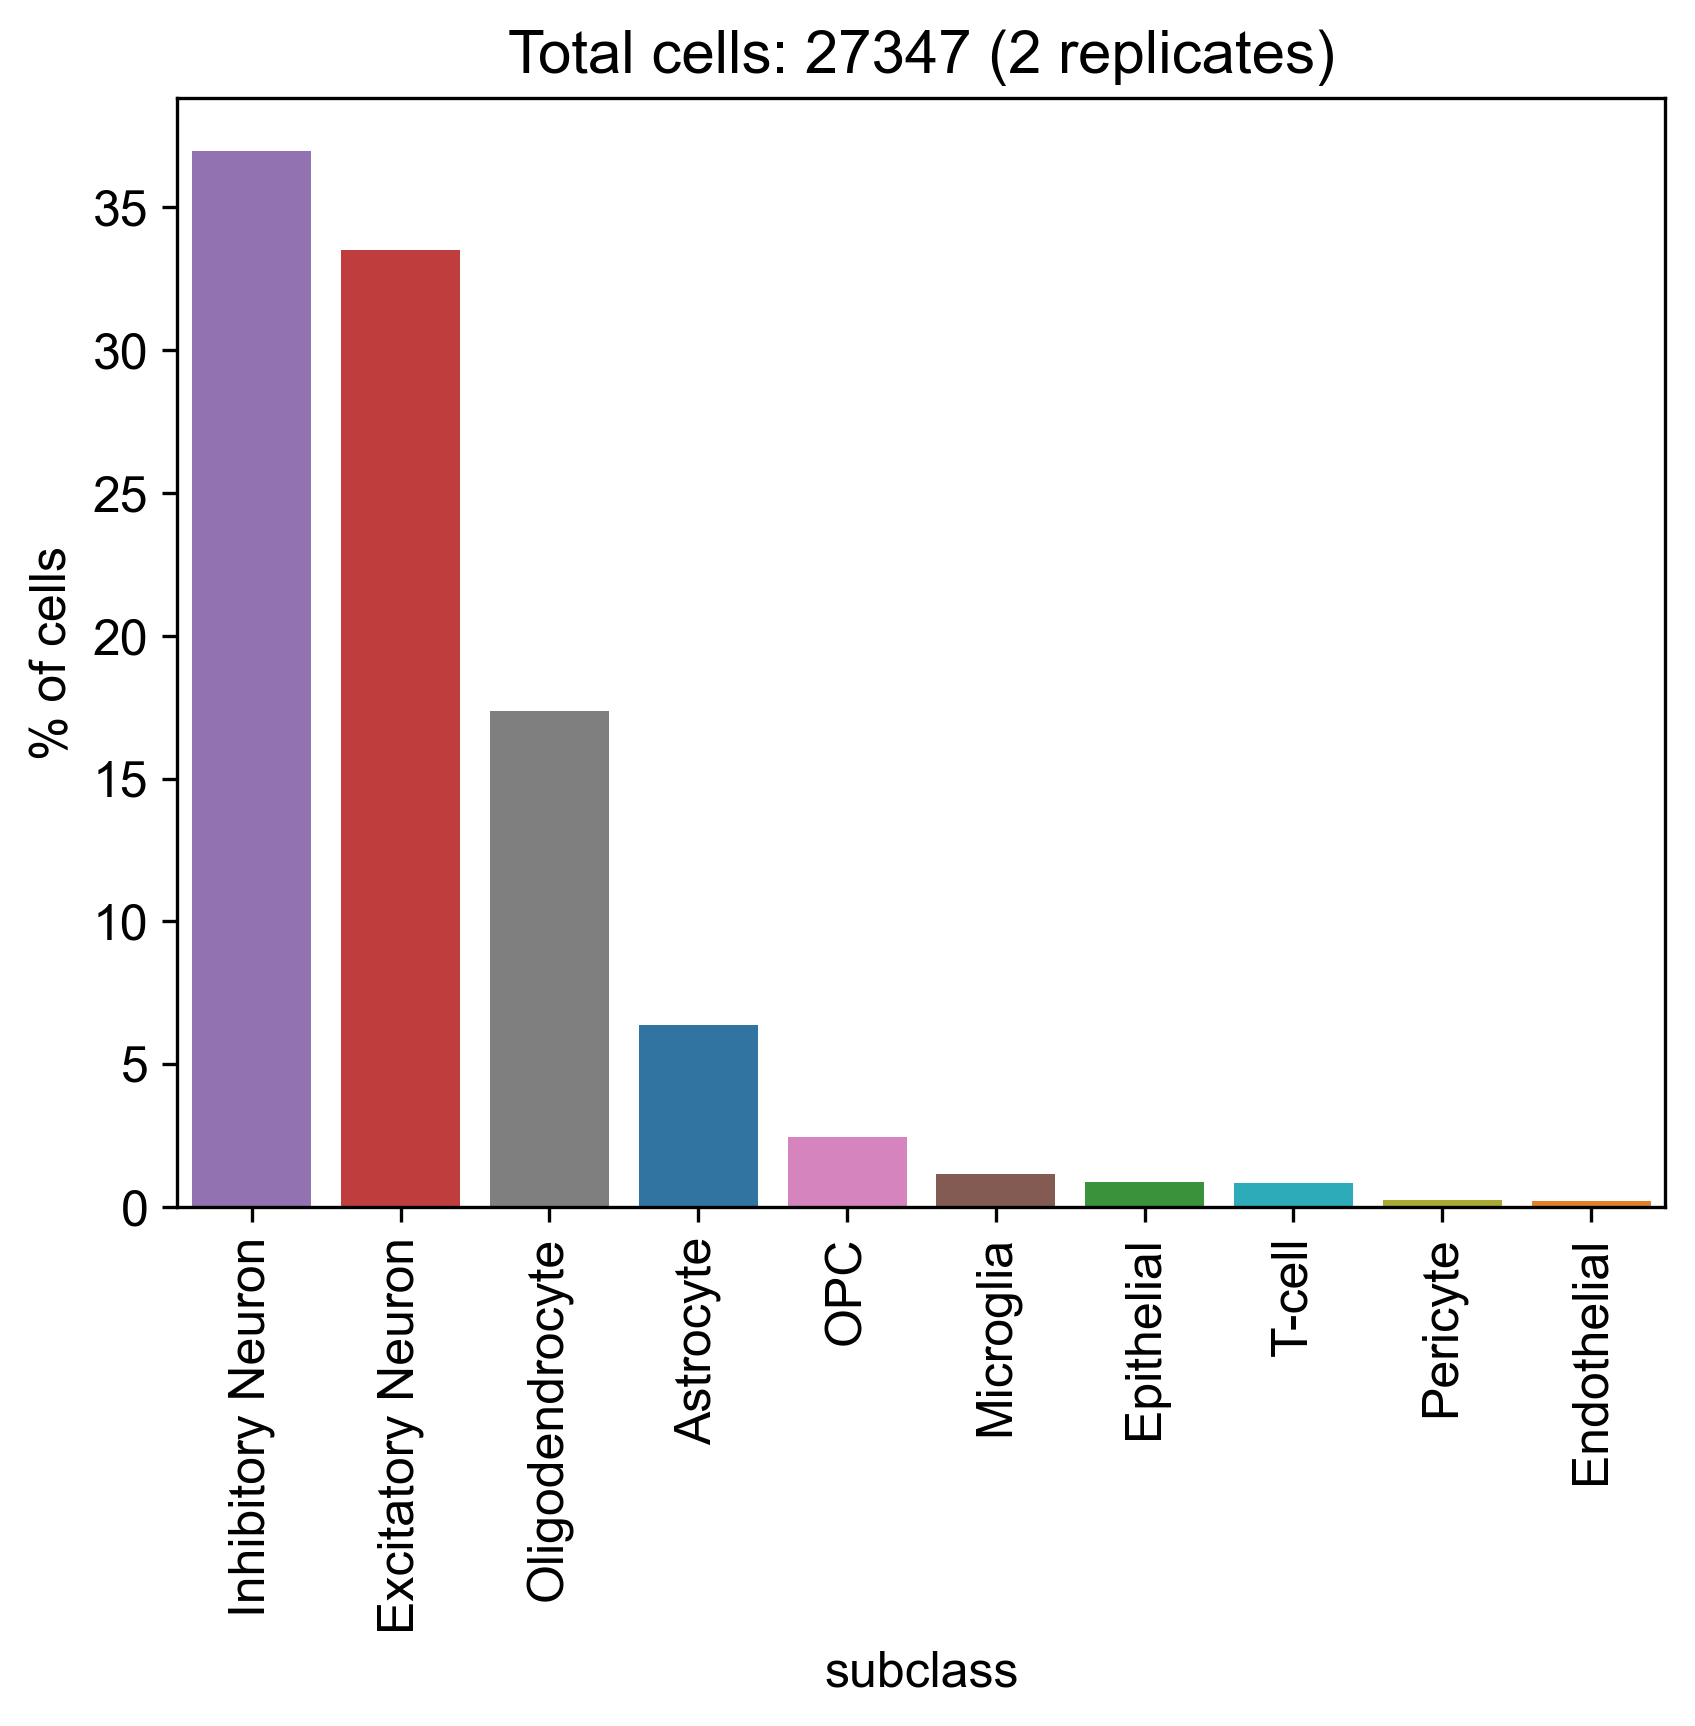

In [6]:
import stereo_seq.utils.exploration as sue
importlib.reload(sco)
importlib.reload(sue)
class_subtypes = sue.create_subtypes(adata,groupby='subclass',subgroups=sco.CLASS_ORDER,key_added='subtypes',output_f="")
sue.summary_stats(
    adata,
    subtype_col='subtypes',color_col='subclass',
    var_names=None,
    categories_order=None,
    figure_dir=figure_dir,
    output_pre="init_"
)
adata.obs['class'] = pd.Categorical(adata.obs['subclass'].map(scc.SUBClASS_TO_CLASS_MAPPING))
assert not any(pd.isna(adata.obs['class']))
adata.write_h5ad(os.path.join(data_dir,"merged_filt.h5ad"))

### Split data

The 'is_doublet' column does not exist in the AnnData object.
recalc: True, check clusternumberTrue, cluster_threshold3, score_cuttoff:None
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.70
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 4.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.0%
Elapsed time: 5.4 seconds


/Users/antheaguo/Documents/Code/brainRCResearch/stereo-seq-kushal/stereo-seq/stereo_seq/utils/preprocessing.py:124: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_r.obs['doublet_score'] = doublet_scores


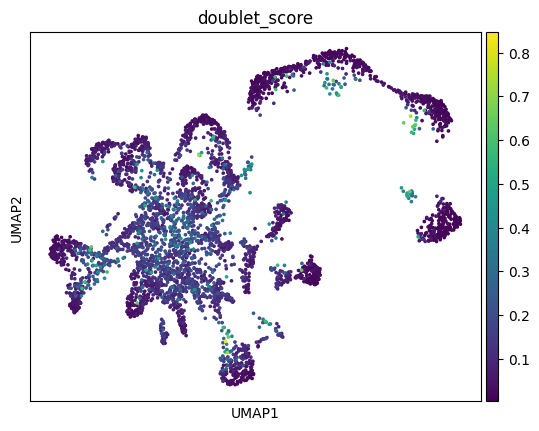

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.72
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.4%
Elapsed time: 5.5 seconds


/Users/antheaguo/Documents/Code/brainRCResearch/stereo-seq-kushal/stereo-seq/stereo_seq/utils/preprocessing.py:124: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_r.obs['doublet_score'] = doublet_scores


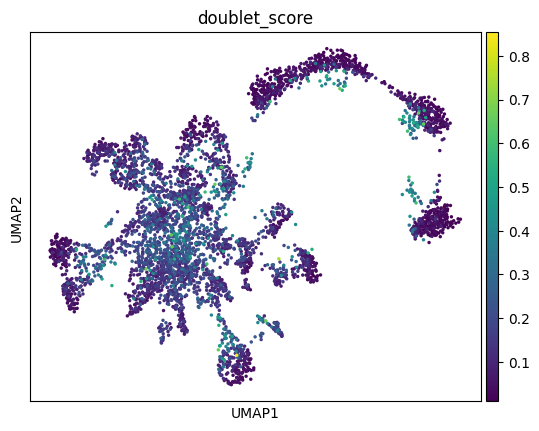

/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


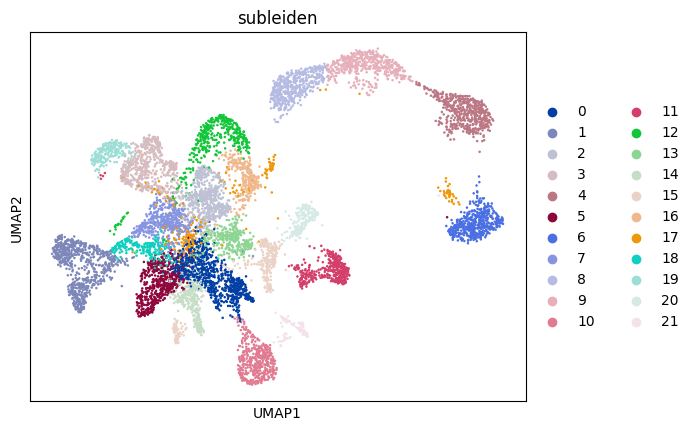

The 'is_doublet' column does not exist in the AnnData object.
recalc: True, check clusternumberTrue, cluster_threshold3, score_cuttoff:None
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 5.0%
Estimated detectable doublet fraction = 57.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 8.6%
Elapsed time: 5.4 seconds


/Users/antheaguo/Documents/Code/brainRCResearch/stereo-seq-kushal/stereo-seq/stereo_seq/utils/preprocessing.py:124: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_r.obs['doublet_score'] = doublet_scores


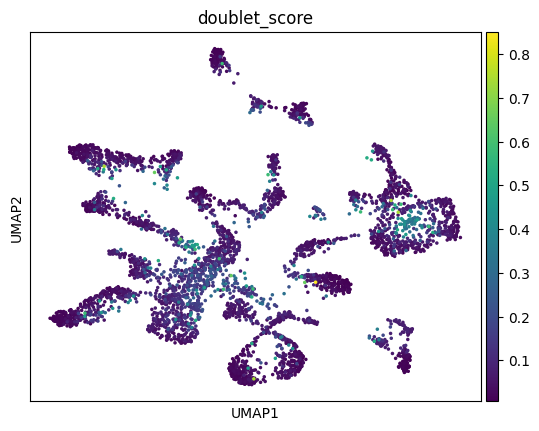

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.73
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 14.8%
Elapsed time: 5.5 seconds


/Users/antheaguo/Documents/Code/brainRCResearch/stereo-seq-kushal/stereo-seq/stereo_seq/utils/preprocessing.py:124: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_r.obs['doublet_score'] = doublet_scores


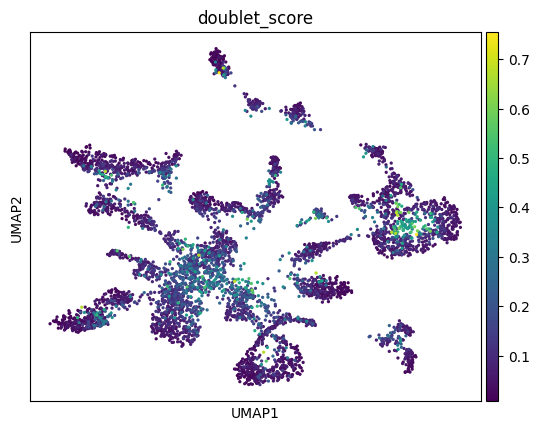

/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


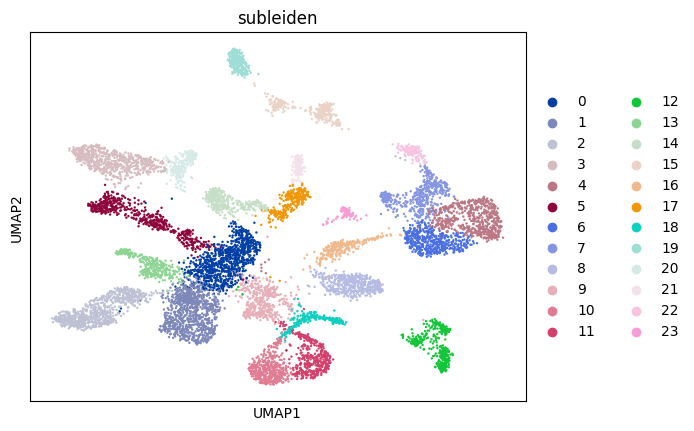

The 'is_doublet' column does not exist in the AnnData object.
recalc: True, check clusternumberTrue, cluster_threshold3, score_cuttoff:None
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.46
Detected doublet rate = 1.8%
Estimated detectable doublet fraction = 44.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.0%
Elapsed time: 4.5 seconds


/Users/antheaguo/Documents/Code/brainRCResearch/stereo-seq-kushal/stereo-seq/stereo_seq/utils/preprocessing.py:124: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_r.obs['doublet_score'] = doublet_scores


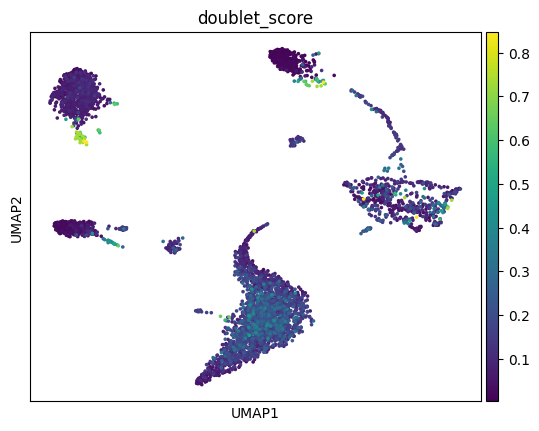

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.31
Detected doublet rate = 4.6%
Estimated detectable doublet fraction = 55.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 8.3%
Elapsed time: 2.8 seconds


/Users/antheaguo/Documents/Code/brainRCResearch/stereo-seq-kushal/stereo-seq/stereo_seq/utils/preprocessing.py:124: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_r.obs['doublet_score'] = doublet_scores


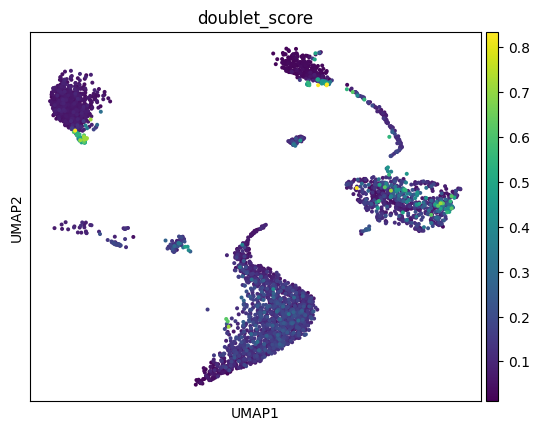

/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


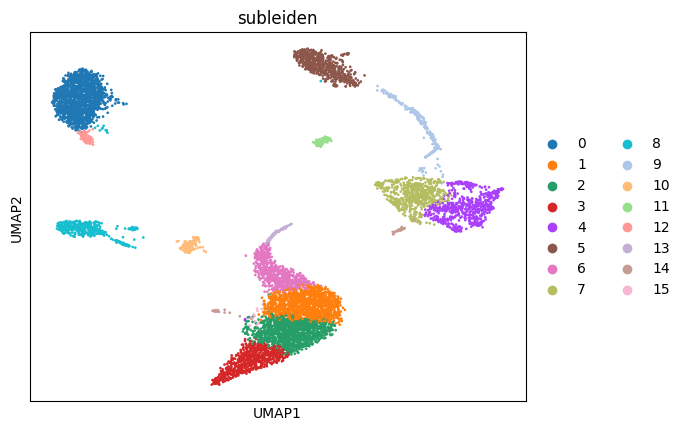

In [7]:
importlib.reload(sup)
#Split into Inhibitory Neuron, Non-neuronal, Excitatory Neuron
sup.split_and_process(
    adata,
    col='class',
    data_dir=data_dir,
    detect_doublets=True,
    override_info=None,
    output_pre=""
)

In [8]:
adata.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 27347 × 32285
    obs: 'sample', 'mRNA_count', 'n_mito', 'pct_mito', 'n_genes', 'n_counts', 'leiden', 'Excitatory Neuron', 'Inhibitory Neuron', 'Astrocyte', 'Microglia', 'OPC', 'Oligodendrocyte', 'Pericyte', 'Meninges', 'Epithelial', 'T-cell', 'Endothelial', 'subclass', 'subtypes', 'class'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'leiden', 'umap', 'sample_colors', 'subclass_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p'
    obsp: 'distances', 'connectivities'>

### Reannotate Non-neuronal

/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


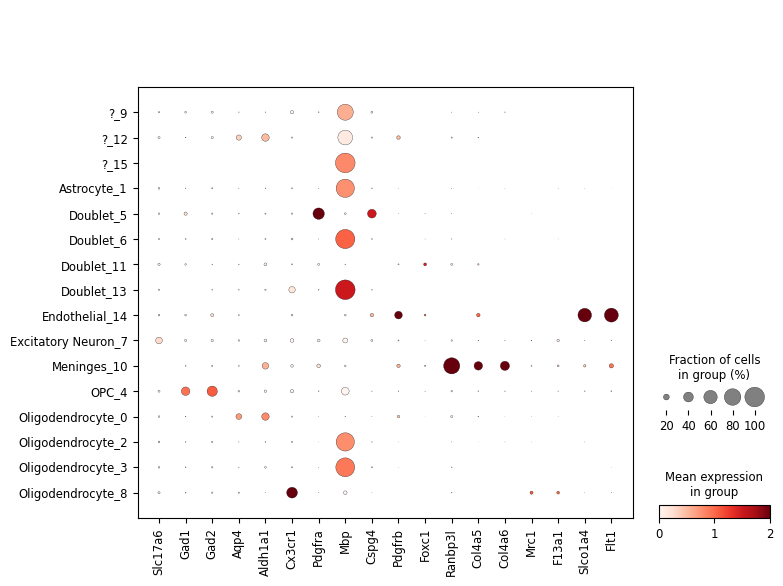

In [9]:
adata=sc.read_h5ad(os.path.join(data_dir,"Non-neuronal.h5ad"))
importlib.reload(sup)
importlib.reload(scc)
for x in ['subclass','subtypes']:
    if x in adata.obs.columns:
        del adata.obs[x]
df = sup.annotate_adata(adata, scm.MARKER_GENES, class_col='subclass', override=scc.UNCERTAIN_MAPPING[region][timepoint][group]['Non-neuronal_override'],cluster_col='subleiden', plot=False,output_f=os.path.join(data_dir,"Non-neuronal.h5ad"))

### Merge NR subadata into main adata

In [10]:
adata_lst =[os.path.join(data_dir,f"{cl}.h5ad") for cl in sorted(list(set(scc.SUBClASS_TO_CLASS_MAPPING.values())))]
importlib.reload(sup)
adata_merged=sc.read_h5ad(os.path.join(data_dir,"merged_filt.h5ad"))
sup.postprocess_and_merge(
    adata_merged=adata_merged,
    adata_lst=adata_lst,
    subclass_col='subclass',
    subtype_col='subtypes',
    rep_col='sample',
    cluster_key='subleiden',
    detect_doublets=True,
    subclass_order=sco.CLASS_ORDER,
    override_info={'col':'subclass','name':'Doublet'},
    output_f=os.path.join(data_dir,"merged_final.h5ad")
)

Replacing the values Index([], dtype='object') in column subclass with Doublet
Warning, Inhibitory Neuron is not present as an actually annotated class; Skipping
Warning, Astrocyte is not present as an actually annotated class; Skipping
Warning, Microglia is not present as an actually annotated class; Skipping
Warning, OPC is not present as an actually annotated class; Skipping
Warning, Oligodendrocyte is not present as an actually annotated class; Skipping
Warning, Pericyte is not present as an actually annotated class; Skipping
Warning, Meninges is not present as an actually annotated class; Skipping
Warning, Epithelial is not present as an actually annotated class; Skipping
Warning, T-cell is not present as an actually annotated class; Skipping
Warning, Endothelial is not present as an actually annotated class; Skipping
Warning, ? is not present as an actually annotated class; Skipping
subtypes
Excitatory Neuron_1     844
Excitatory Neuron_2     711
Excitatory Neuron_3     601
Excit

Categories Order: ['Excitatory Neuron', 'Excitatory Neuron_1', 'Excitatory Neuron_2', 'Excitatory Neuron_3', 'Excitatory Neuron_4', 'Excitatory Neuron_5', 'Excitatory Neuron_6', 'Excitatory Neuron_7', 'Excitatory Neuron_8', 'Excitatory Neuron_9', 'Excitatory Neuron_10', 'Excitatory Neuron_11', 'Excitatory Neuron_12', 'Excitatory Neuron_13', 'Excitatory Neuron_14', 'Excitatory Neuron_15', 'Excitatory Neuron_16', 'Excitatory Neuron_17', 'Excitatory Neuron_18', 'Excitatory Neuron_19', 'Excitatory Neuron_20', 'Excitatory Neuron_21', 'Excitatory Neuron_22', 'Inhibitory Neuron_1', 'Inhibitory Neuron_2', 'Inhibitory Neuron_3', 'Inhibitory Neuron_4', 'Inhibitory Neuron_5', 'Inhibitory Neuron_6', 'Inhibitory Neuron_7', 'Inhibitory Neuron_8', 'Inhibitory Neuron_9', 'Inhibitory Neuron_10', 'Inhibitory Neuron_11', 'Inhibitory Neuron_12', 'Inhibitory Neuron_13', 'Inhibitory Neuron_14', 'Inhibitory Neuron_15', 'Inhibitory Neuron_16', 'Inhibitory Neuron_17', 'Inhibitory Neuron_18', 'Inhibitory Neuron

/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


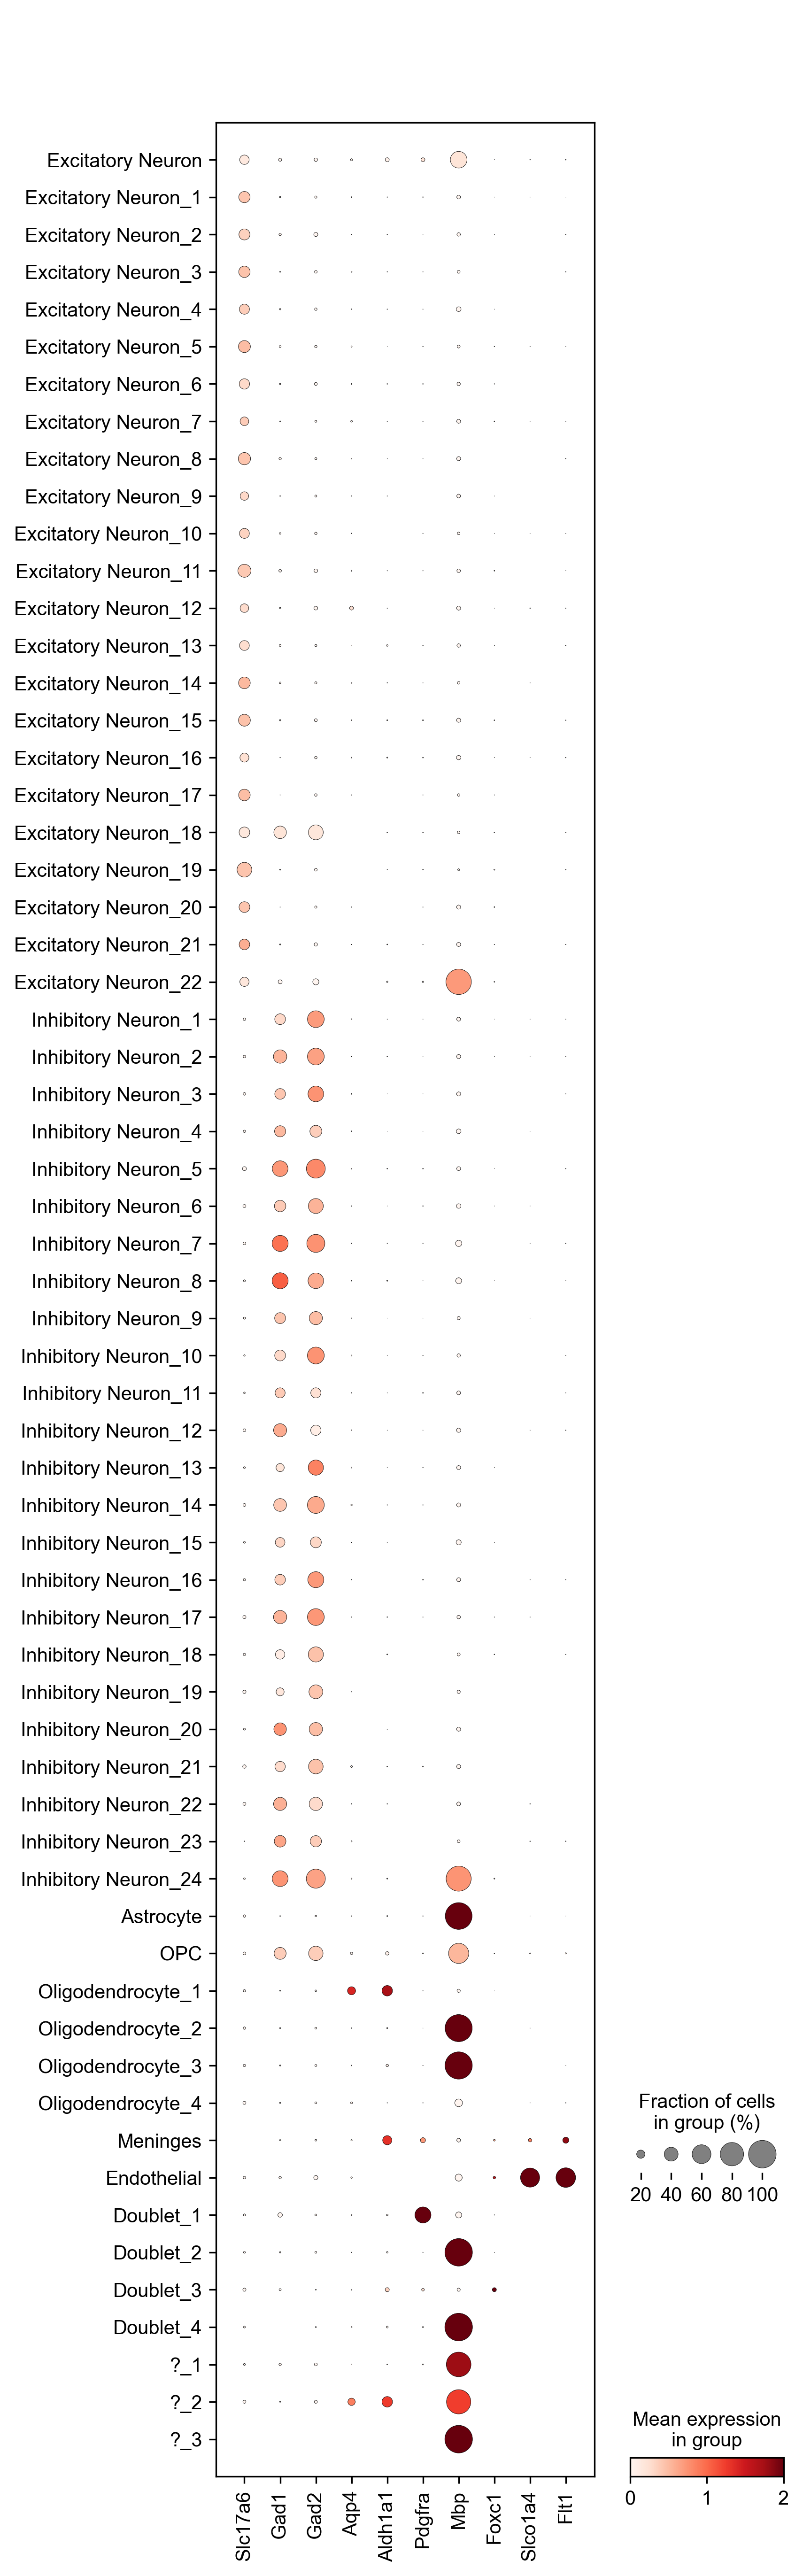

/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/antheaguo/anaconda3/envs/stereo-seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector

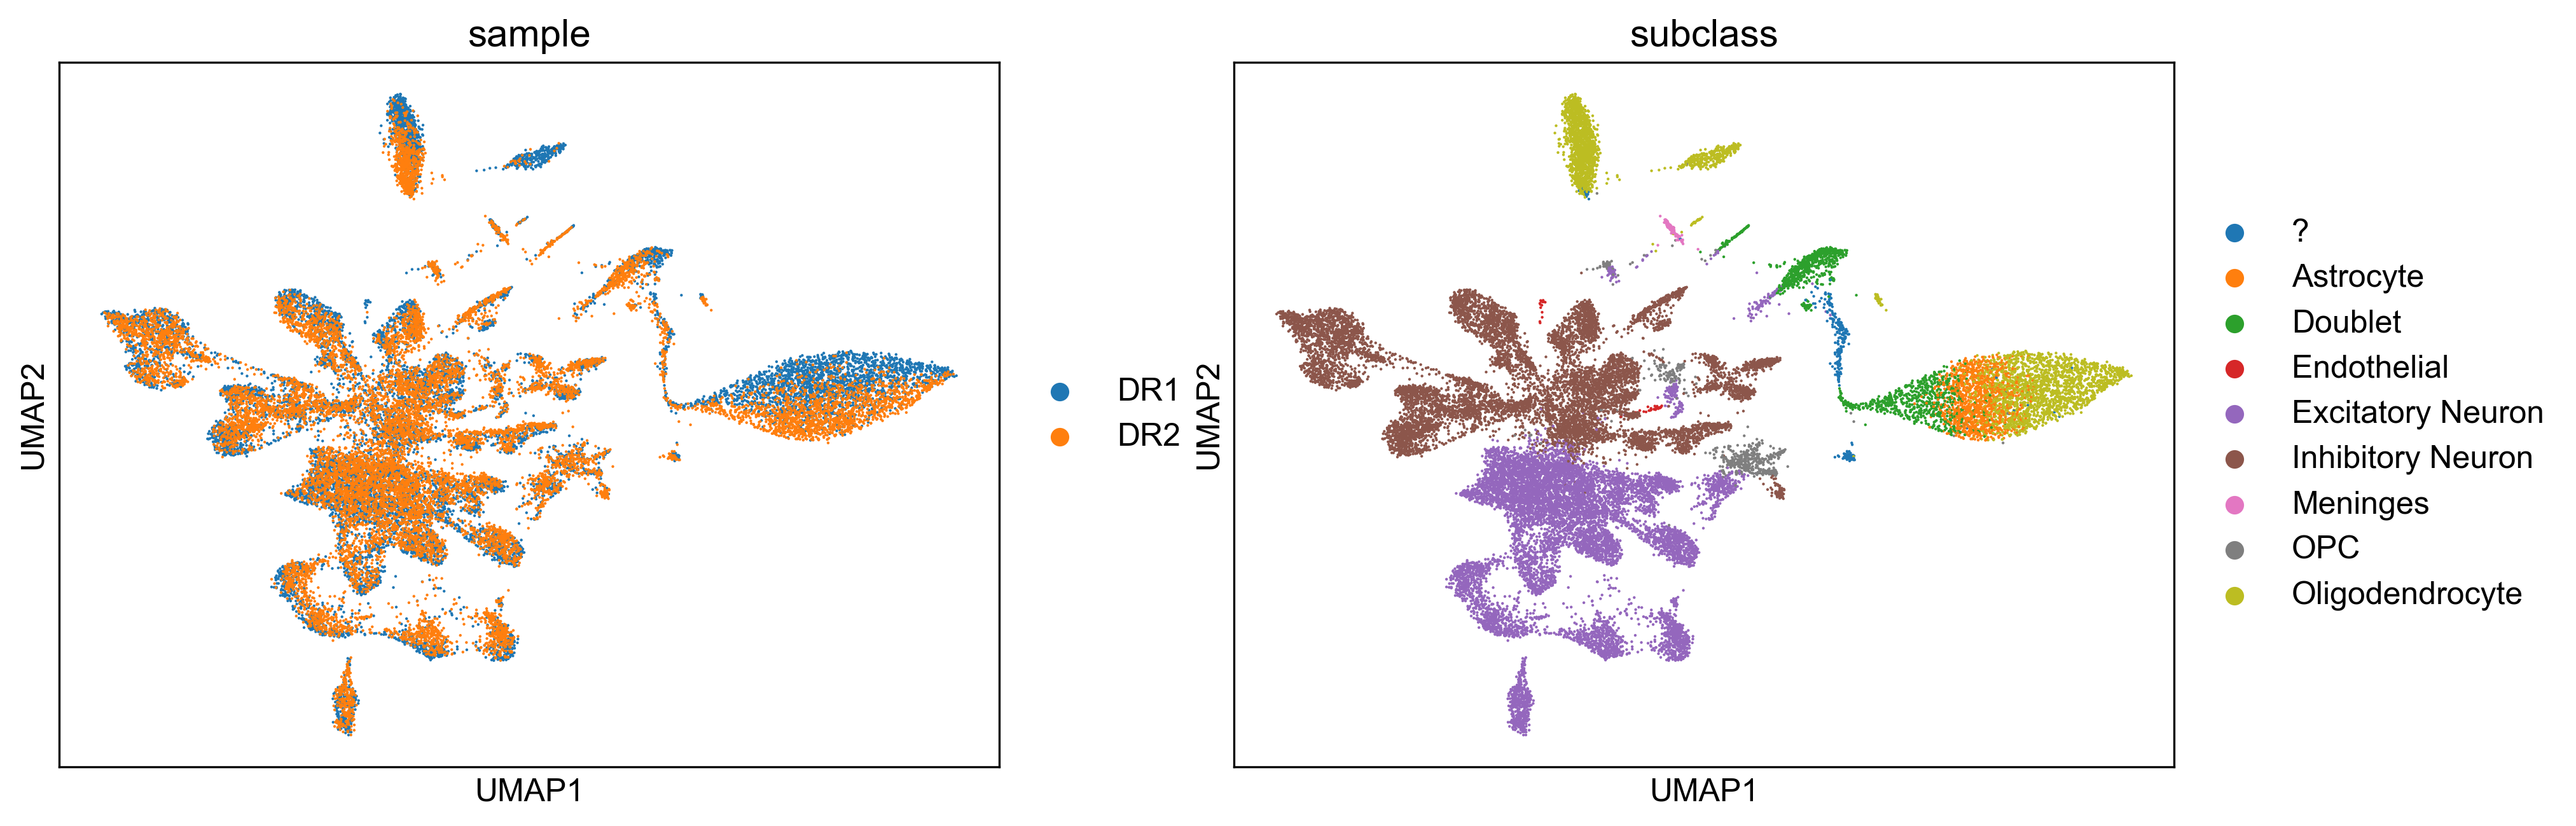

/Users/antheaguo/Documents/Code/brainRCResearch/stereo-seq-kushal/stereo-seq/stereo_seq/utils/exploration.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


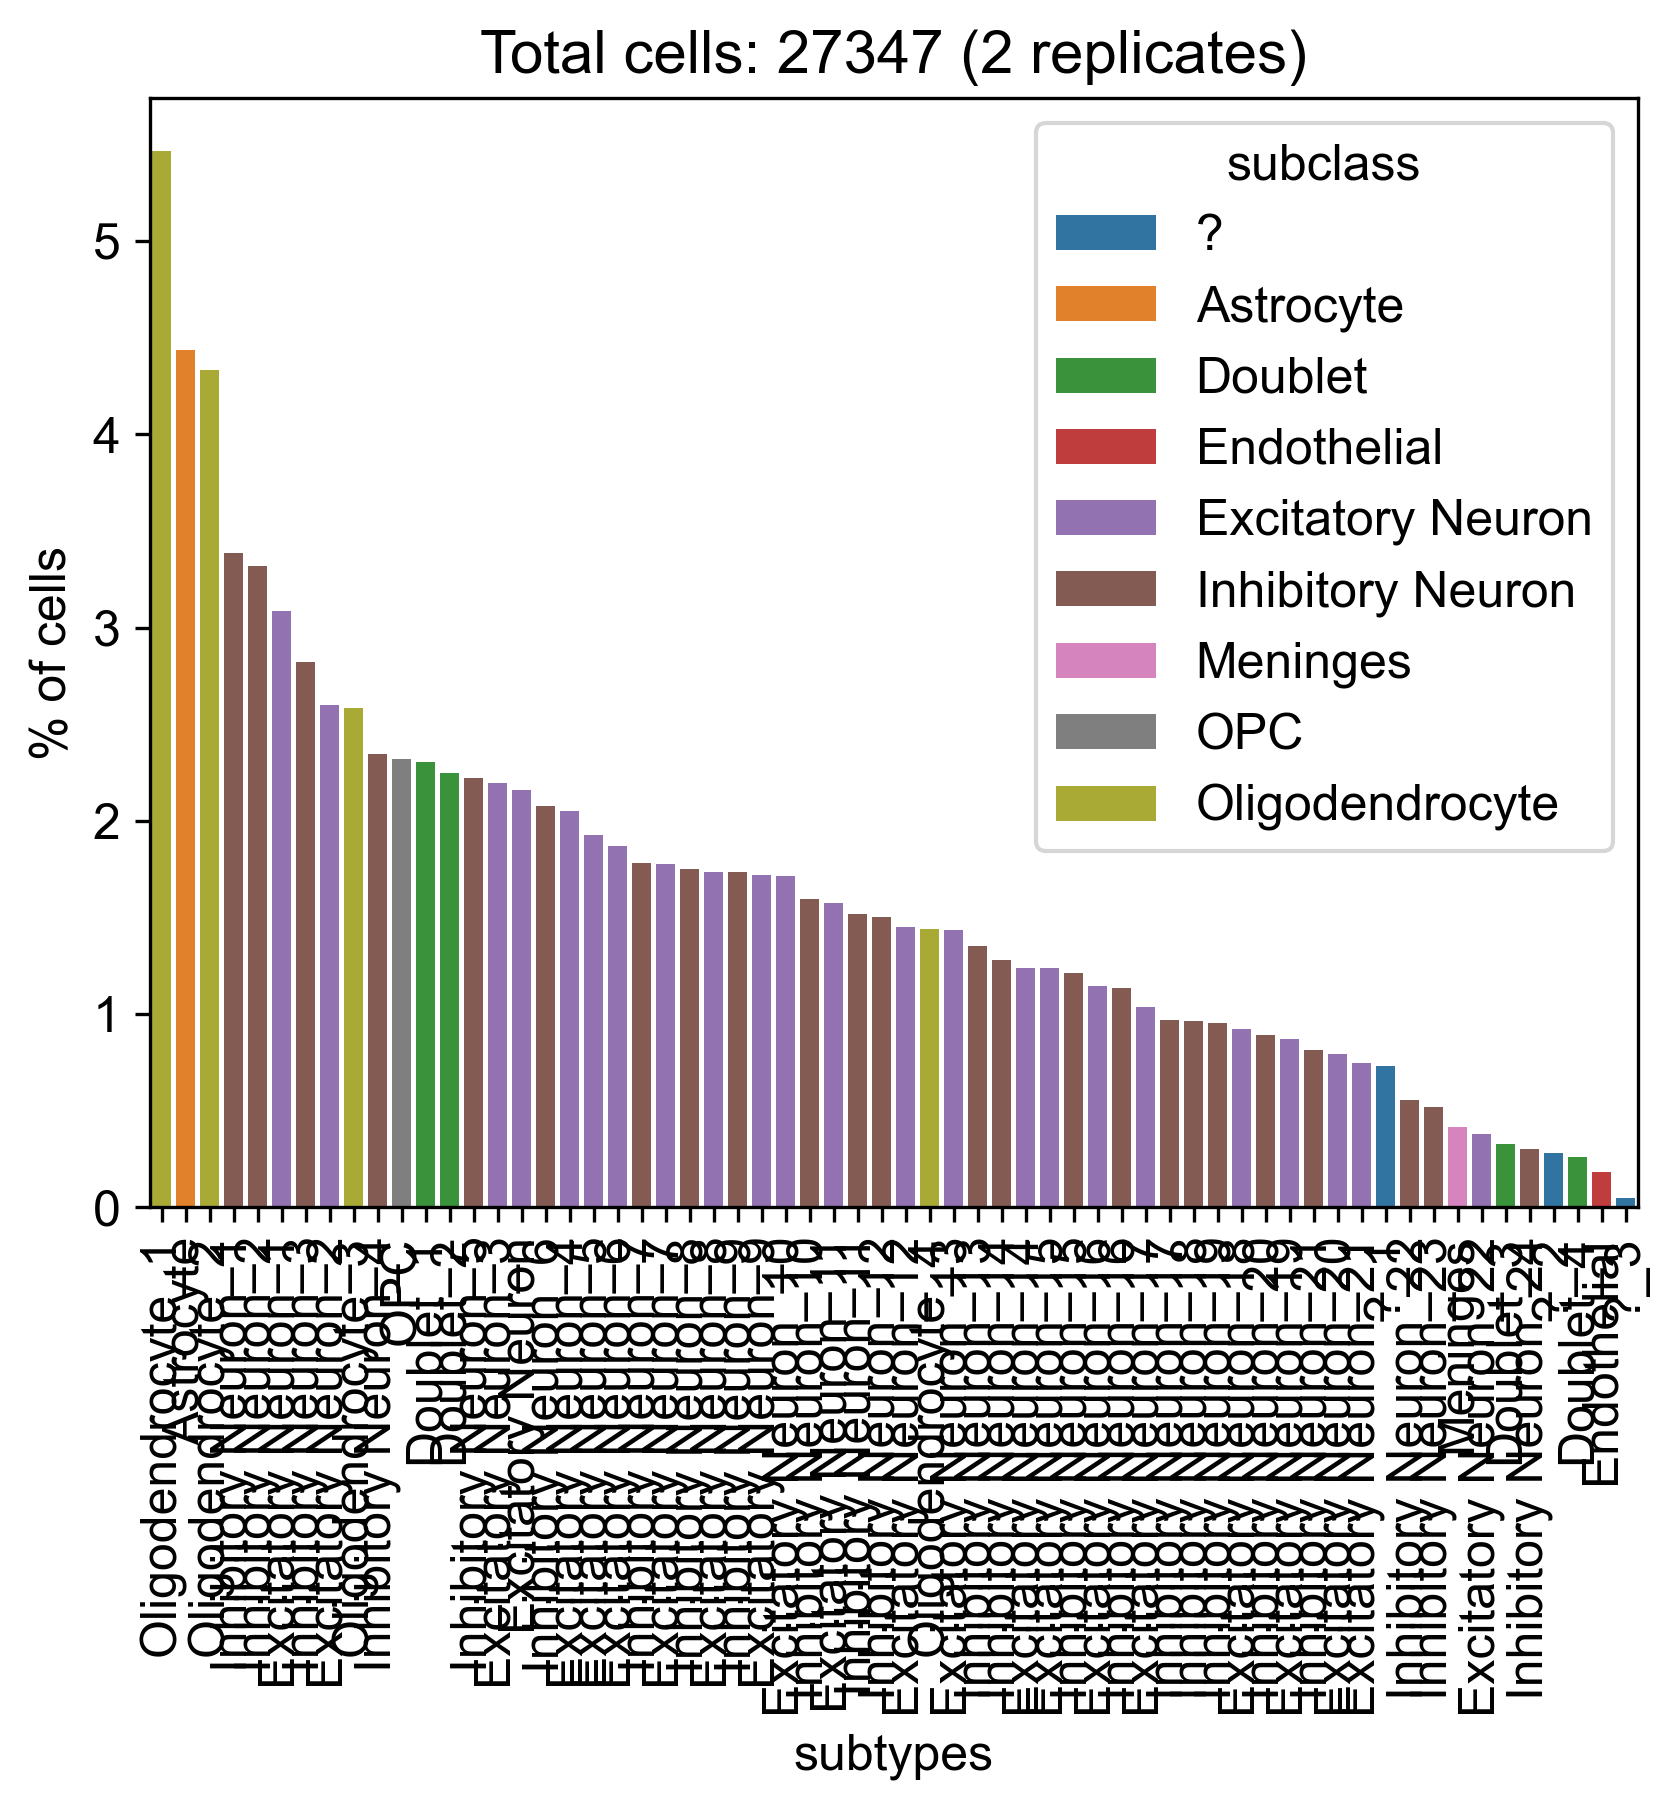

/Users/antheaguo/Documents/Code/brainRCResearch/stereo-seq-kushal/stereo-seq/stereo_seq/utils/exploration.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


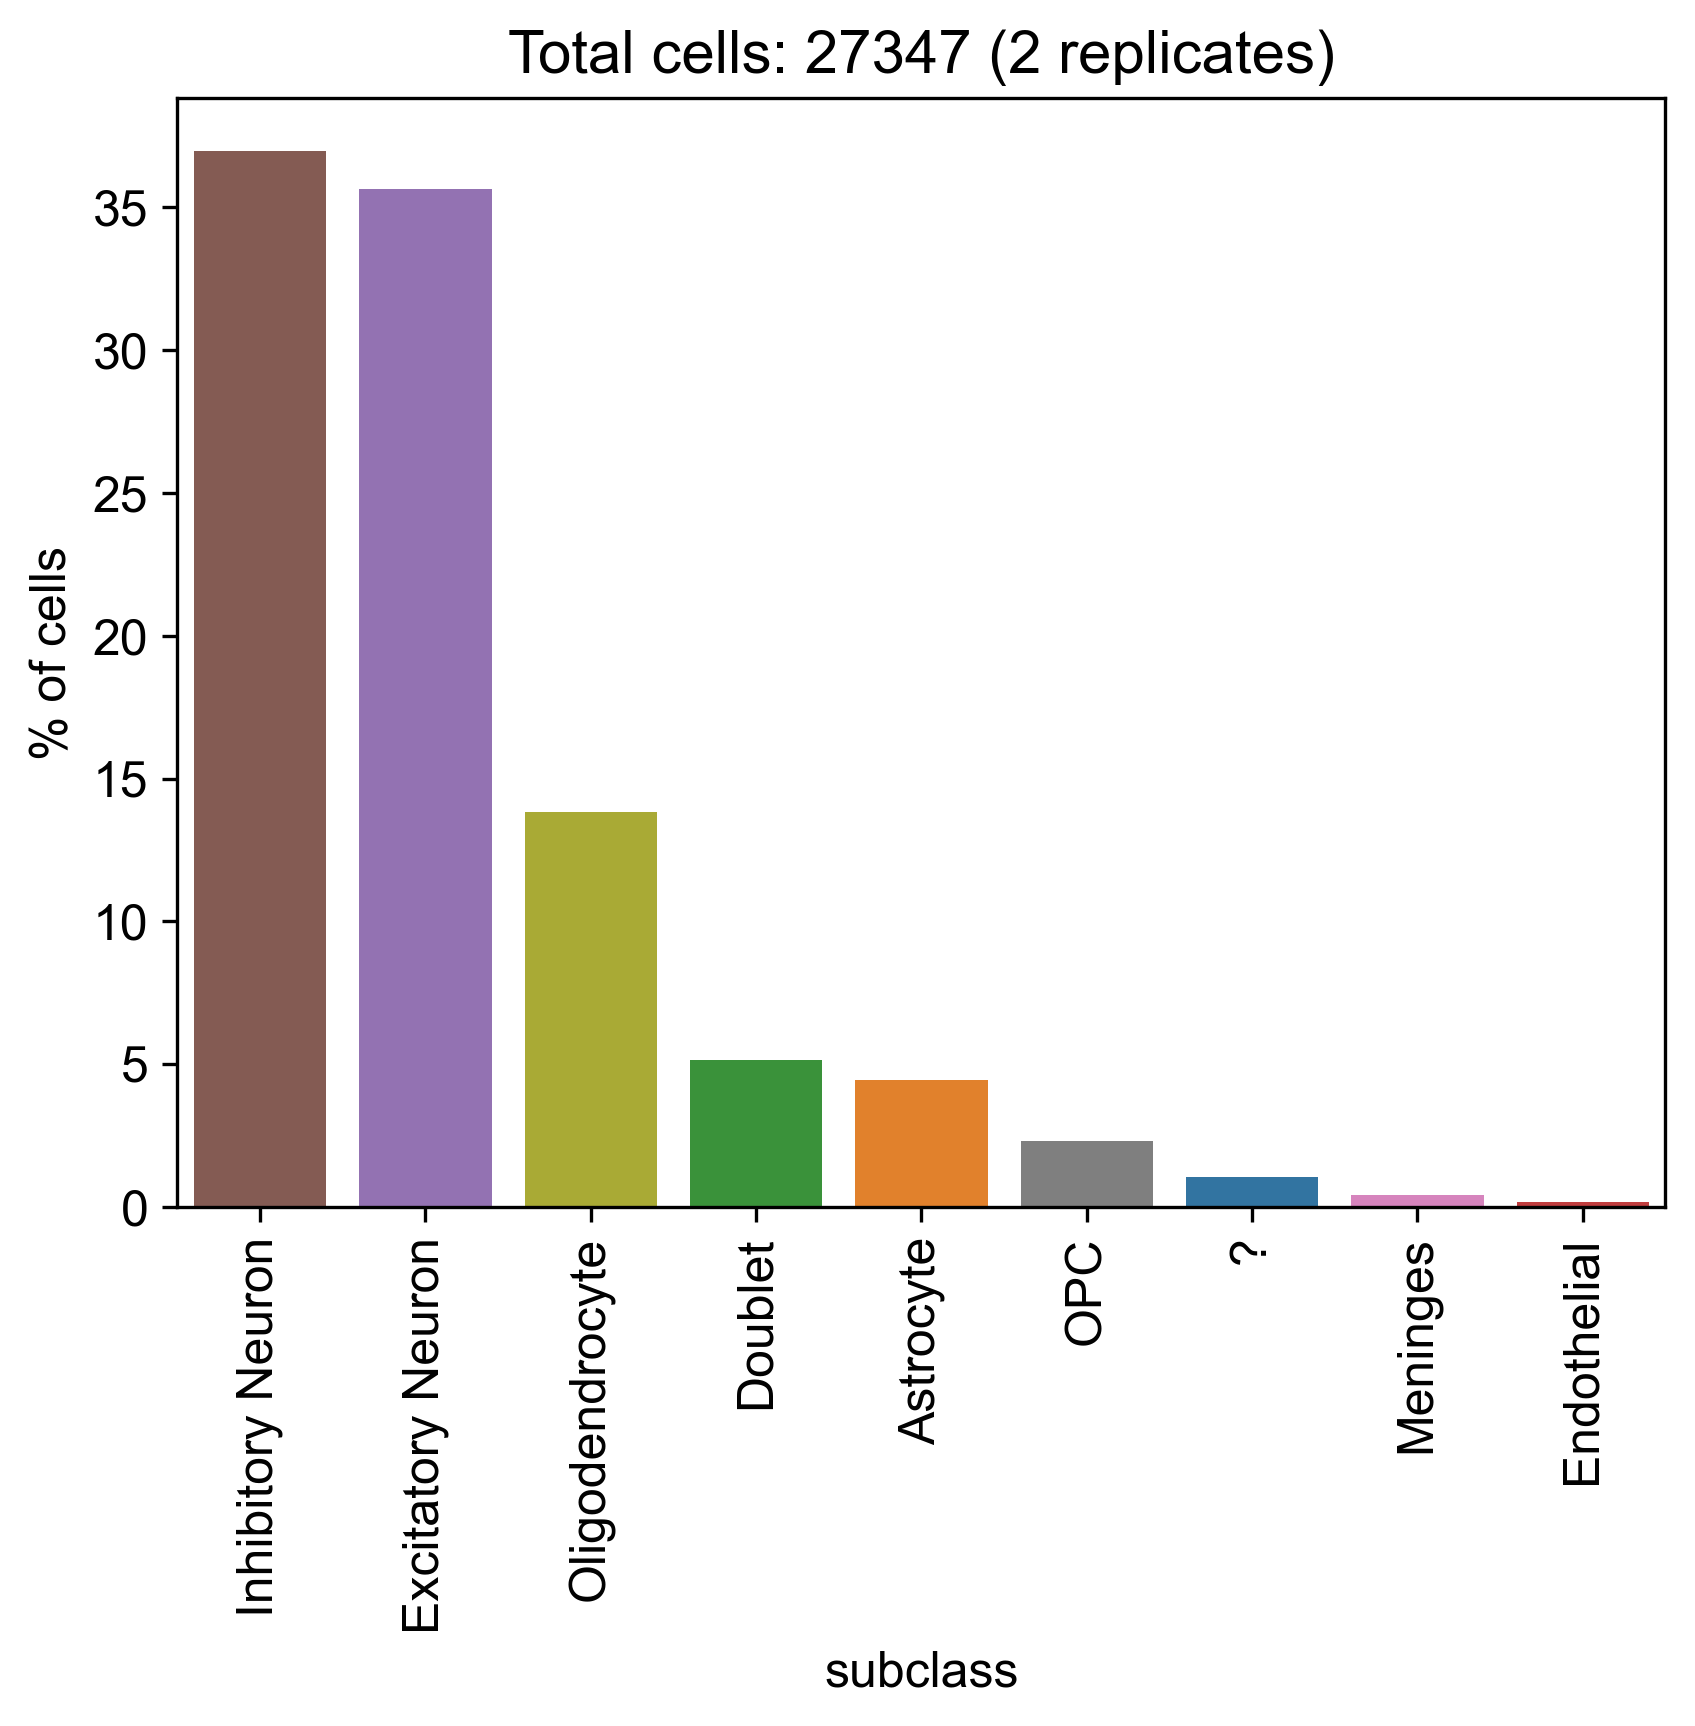

In [11]:
adata = sc.read_h5ad(os.path.join(data_dir,"merged_final.h5ad"))
importlib.reload(scm)
importlib.reload(sue)
importlib.reload(pl)
sue.summary_stats(
    adata,
    subtype_col='subtypes',color_col='subclass',
    var_names=None,
    categories_order=None,
    figure_dir=figure_dir,
    output_pre="fin_"
)

In [12]:
import stereo_seq.utils.classifier as suc
importlib.reload(suc)
region,timepoint,model_name = 'SC','P42','excitatory_Xie_SC'
test_data_dir,test_col,key_added = scp.make_path(base='data',region=region,timepoint=timepoint,group="NR",subgroup=''),'subleiden','Xie_type'

suc.run_classification_pipeline(
    region,timepoint,model_name,test_data_dir,test_col,key_added,
    preprocess_train=True,preprocess_test=False,train_model=False,run_full=False,evaluate_test=True
)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../data/atlas/Xie_SC.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
importlib.reload(smi)
for mname in ['excitatory_NR','non-neuronal_NR','inhibitory_NR']:
    region,timepoint,model_name = 'SC','P42',mname
    test_data_dir,test_col,key_added = scp.make_path(base='data',region=region,timepoint=timepoint,group="DR",subgroup=''),'subleiden','NR_subleiden'

    adata_test = run_classification_pipeline(
        region,timepoint,model_name,test_data_dir,test_col,key_added,
        preprocess_train=False,preprocess_test=False,train_model=False,run_full=False,evaluate_test=True
    )

### NRDR 

In [ ]:
region = 'SC'
timepoint='P42'
group='NRDR'
subgroup='annotation'
importlib.reload(scp)
scp.init_paths(region)


data_dir = scp.make_path(base='data',region=region,timepoint=timepoint,group=group,subgroup='')
data_dir_NR = scp.make_path(base='data',region=region,timepoint=timepoint,group="NR",subgroup='')
data_dir_DR = scp.make_path(base='data',region=region,timepoint=timepoint,group="DR",subgroup='')
figure_dir = scp.make_path(base='figures',region=region,timepoint=timepoint,group=group,subgroup=subgroup)

In [ ]:
importlib.reload(sup)
def _post_merge(adata):
    adata.X=adata.raw.X.copy()
    del adata.layers['log1p']
    adata.obs['rearing_condition'] = [x[0:2] for x in adata.obs['sample']]

for group in scc.CLASSES:
    data_str = f"{group}.h5ad"
    sup.merge_and_reprocess(
        adata_lst=[
            os.path.join(data_dir_NR,data_str),
            os.path.join(data_dir_DR,data_str)
        ],
        joint_cluster_key_added='NRDR_leiden',
        figure_dir=figure_dir,
        output_f=os.path.join(data_dir,"test.h5ad"),
        post_merge_func=_post_merge,
    )


In [ ]:
#Deprecated
"""
adata = sc.read_h5ad(os.path.join(data_dir,"Excitatory Neuron.h5ad"))
adata.obs['NR_subleiden'].fillna(adata.obs['subleiden'].cat.add_categories(['Unassigned']),inplace=True)
adata_DR2 = adata[adata.obs['rearing_condition'] == 'DR']

pl.crosstab_confusion(adata_DR2,x_col='NR_subleiden',y_col='subleiden')
sue.gen_assignment(adata_DR2,col_0='subleiden',col_1='NR_subleiden',assignment_strat='max',cutoff=0.4,unmapped_key='Unmapped')#For every type in col_0, assign to col_1 (col_1 is usually classifier)
"""

### NR vs DR genes

In [ ]:
import stereo_seq.utils.exploration as sue

In [ ]:
region = 'SC'
timepoint='P42'
group='NRDR'
subgroup='annotation'
importlib.reload(scp)
scp.init_paths(region)


data_dir = scp.make_path(base='data',region=region,timepoint=timepoint,group=group,subgroup='')
figure_dir = scp.make_path(base='figures',region=region,timepoint=timepoint,group=group,subgroup='classification')

In [ ]:
importlib.reload(sue)
for cl in scc.CLASSES:
    f=os.path.join(data_dir,f"{cl}.h5ad")
    adata = sc.read_h5ad(f)
    adata.obs['NR_subleiden'].fillna(adata.obs['subleiden'].cat.add_categories(['Unassigned']),inplace=True)
    adata_DR2 = adata[adata.obs['rearing_condition'] == 'DR']

    with plt.rc_context(PLT_CONTEXT):
        pl.crosstab_confusion(adata_DR2,x_col='NR_subleiden',y_col='subleiden',output_f=os.path.join(figure_dir,f"{cl}_NR_DR_mapping.png"))
        sue.gen_assignment(adata_DR2,col_0='subleiden',col_1='NR_subleiden',assignment_strat='max',cutoff=0.4,unmapped_key='Unmapped')#For every type in col_0, assign to col_1 (col_1 is usually classifier)
    
    sue.summary_integration(adata,cluster_key='NRDR_leiden',sample_key='rearing_condition',figure_dir=figure_dir,output_data_f=f)

In [ ]:
#class_subtypes = sue.create_subtypes(adata,groupby='subclass',key='NRDR_leiden',subgroups=sco.CLASS_ORDER,key_added='subtypes',output_f="")
split_key,type_key,key_added='rearing_condition','NRDR_leiden','rank_genes_groups_filtered'
info,hits = sue.get_stratified_diff_genes(adata,split_key,type_key,key_added,subcats=None,plot=True,output_dir=os.path.join(figure_dir,"genes"),pre='NN')

In [ ]:
pl.construct_dotplot(adata,marker_genes=info['diff_genes']['NR'],cluster_key='NRDR_leiden',include=['0','1','5','7','9','14','10'])


In [ ]:
adata.obs['condition_leiden'] =  adata.obs['NRDR_leiden'].astype(str) + adata.obs['rearing_condition'].astype(str)
with plt.rc_context(PLT_CONTEXT):
    sc.pl.dotplot(adata,groupby='condition_leiden',var_names=['Tcf20','Vmn2r88','Tcf19'],vmin=0,vmax=2,swap_axes=False,cmap='BuPu',show=False)
    plt.savefig(os.path.join(figure_dir,"excitatory_possible.png"),bbox_inches='tight')